Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se

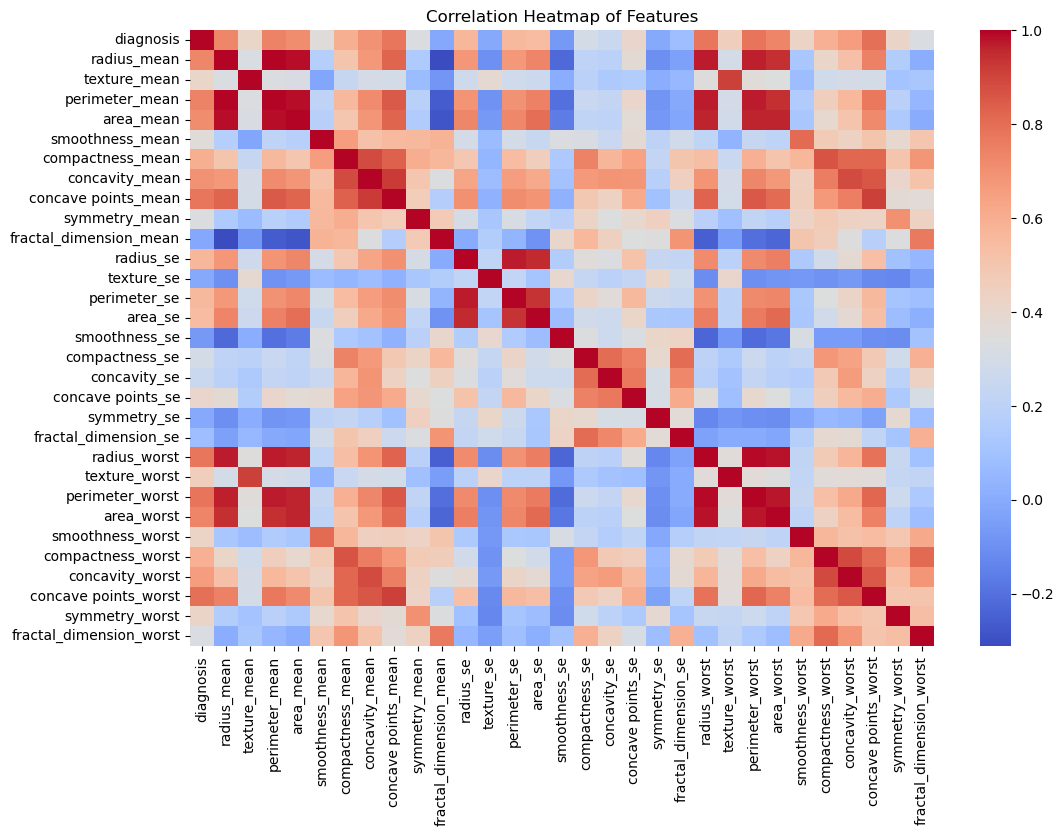


Training SVM...

Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



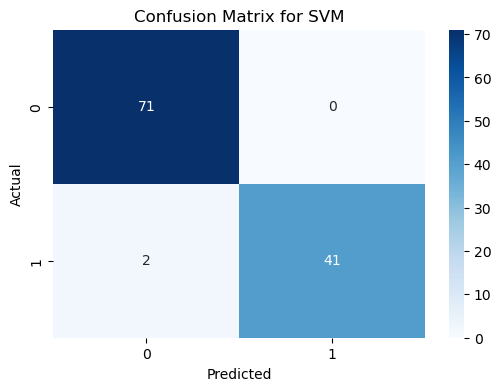


Training RandomForest...

Best Parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



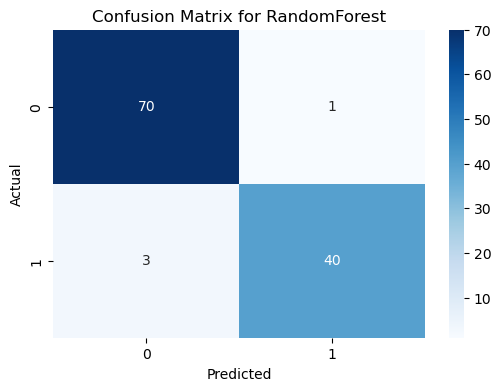


Training LogisticRegression...

Best Parameters for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



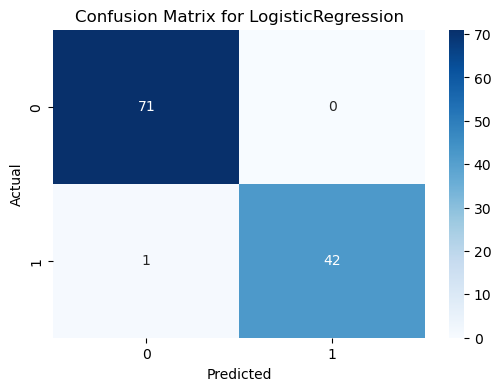


Model Comparison:
                Model                                    Best Parameters  \
0                 SVM        {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}   
1        RandomForest  {'max_depth': None, 'min_samples_split': 2, 'n...   
2  LogisticRegression                  {'C': 0.1, 'solver': 'liblinear'}   

   Accuracy  Precision    Recall  F1 Score  
0  0.982456    1.00000  0.953488  0.976190  
1  0.964912    0.97561  0.930233  0.952381  
2  0.991228    1.00000  0.976744  0.988235  


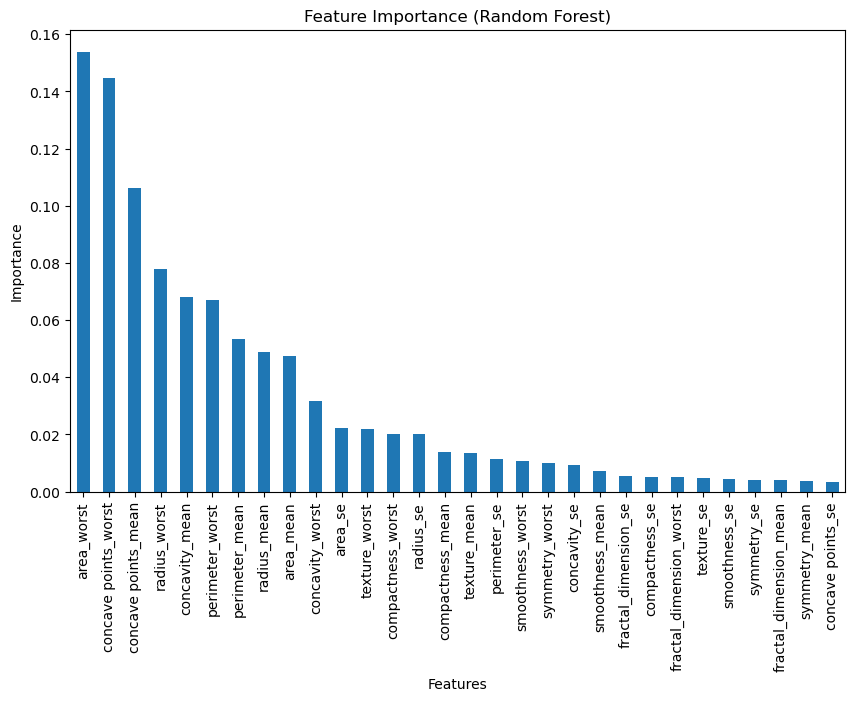

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/Users/apple/Downloads/breast-cancer.csv')

# Understand the Dataset & Cleanup
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nDiagnosis Distribution:")
print(data['diagnosis'].value_counts())

# Cleanup: Drop 'id' column and handle diagnosis encoding
data = data.drop('id', axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Convert to binary (M=1, B=0)

# Verify no missing values or further cleanup needed
if data.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    data = data.fillna(data.mean()) 


X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize Feature Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

# Define Models and Hyperparameters for Classification
models = {
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto', 0.1, 1]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    }
}

# Build and Fine-tune Classification Models
results = []
for model_name, config in models.items():
    print(f"\nTraining {model_name}...")
    try:
        
        grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=1)
        grid_search.fit(X_train_scaled, y_train)
        
        # Get the best model
        best_model = grid_search.best_estimator_
        
       
        y_pred = best_model.predict(X_test_scaled)
        
       
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
       
        results.append({
            'Model': model_name,
            'Best Parameters': grid_search.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
        

        print(f"\nBest Parameters for {model_name}: {grid_search.best_params_}")
        print(f"\nClassification Report for {model_name}:")
        print(classification_report(y_test, y_pred))
        
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    except Exception as e:
        print(f"Error during {model_name} training: {e}")
        continue


results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Feature Importance for Random Forest
try:
    rf_model = models['RandomForest']['model'].fit(X_train_scaled, y_train)
    feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar')
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()
except Exception as e:
    print(f"Error during feature importance calculation: {e}")